In [218]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [219]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [220]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [221]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    errors = y- np.dot(tx,w)
    mse = np.mean(errors ** 2)
    return mse
   

# 2. Grid Search

Fill in the function `grid_search()` below:

In [222]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))

    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):

            w = np.array([w0, w1])
        
            losses[i, j] = compute_loss(y, tx, w)

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356496, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.005 seconds


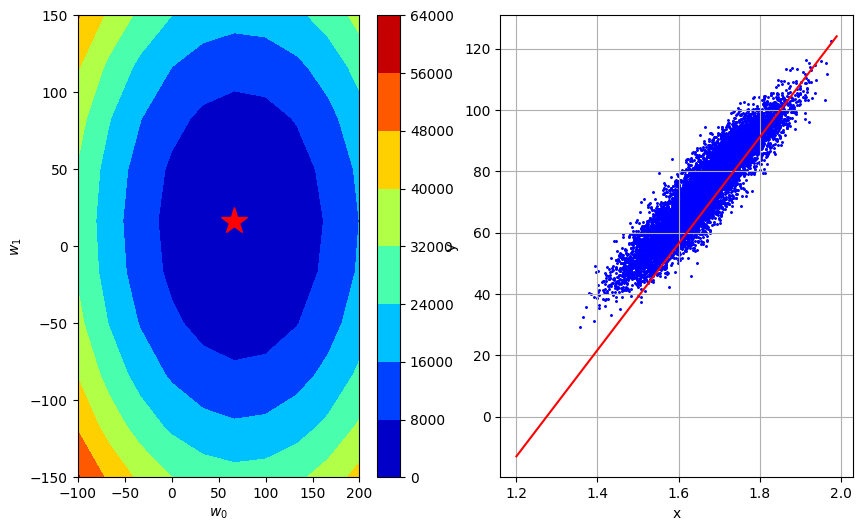

In [223]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [224]:
import numpy as np

def compute_gradient(y, tx, w):
    """Computes the gradient of the MSE loss at w.

    Args:
        y: numpy array of shape=(N,)
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        A numpy array of shape (2,), containing the gradient of the loss at w.
    """
    errors = y - np.dot(tx, w)
    
    gradient = -(1 / len(y)) * np.dot(tx.T, errors)
    
    return gradient


Please fill in the functions `gradient_descent` below:

In [225]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma*gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [226]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=5584.473425518335, w0=51.30574540147361, w1=9.435798704492278
GD iter. 1/49: loss=530.6049242179212, w0=66.69746902191571, w1=12.266538315840002
GD iter. 2/49: loss=75.75675910088253, w0=71.31498610804834, w1=13.11576019924433
GD iter. 3/49: loss=34.82042424034894, w0=72.70024123388814, w1=13.37052676426563
GD iter. 4/49: loss=31.136154102900914, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=30.80456979053059, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=30.77472720241726, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=30.77204136948706, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=30.771799644523348, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=30.77177788927661, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=30.7717759313044, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=30.771775755086907, w0=73.29388305071, w1=13.479705271317192
GD iter.

In [227]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [228]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    return compute_gradient(y,tx,w)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):

        for y_batch, tx_batch in batch_iter(y, tx, batch_size):
            gradient = compute_stoch_gradient(y_batch, tx_batch, w)
            loss = compute_loss(y_batch, tx_batch, w)
            w = w - gamma * gradient
            
            # Store w and loss
            ws.append(w)
            losses.append(loss)

            print(
                "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                    bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
                )
            )
    
    return losses, ws

In [229]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=4151.144821495182, w0=6.4429378558970924, w1=-4.518951896392679
SGD iter. 1/49: loss=2525.9130866825267, w0=11.468784139541796, w1=-7.949944221221688
SGD iter. 2/49: loss=612.5628118062459, w0=13.943784769453323, w1=-11.252437754211076
SGD iter. 3/49: loss=8861.325728448948, w0=23.357246262681493, w1=3.439075968282271
SGD iter. 4/49: loss=3141.089915312758, w0=28.961788987393973, w1=5.366337727677714
SGD iter. 5/49: loss=1132.2462600760393, w0=32.32667570179617, w1=3.592923990113937
SGD iter. 6/49: loss=366.7990924549365, w0=34.24187567165555, w1=-0.1984657518441586
SGD iter. 7/49: loss=466.6425226522723, w0=36.402066687867475, w1=-2.7888685077560047
SGD iter. 8/49: loss=3429.079061648372, w0=42.257900583777065, w1=5.552699109823331
SGD iter. 9/49: loss=1201.0298168684785, w0=45.7234882927645, w1=4.391006257059935
SGD iter. 10/49: loss=370.3689240330771, w0=47.64798543236507, w1=4.2967414411648015
SGD iter. 11/49: loss=1753.4035069526406, w0=51.83535155792973, w1=1

In [230]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [231]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
#height, weight, gender = load_data(sub_sample=True, add_outlier=False)
height, weight, gender = load_data(sub_sample=True, add_outlier=True)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [232]:
y.shape, tx.shape

((202,), (202, 2))

In [233]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Generate or load your data
# For example, let's assume you have the following (subsampled) data:
# y = np.array([...])  # les valeurs cibles
# tx = np.array([...])  # les données d'entrée

# Start gradient descent.
start_time = datetime.datetime.now()

# Apply gradient descent on the data
losses, ws = gradient_descent(y, tx, w_initial, max_iters, gamma)


end_time = datetime.datetime.now()

# Print result
execution_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=execution_time))


GD iter. 0/49: loss=5739.670229071705, w0=51.847464098448484, w1=7.724426406192441
GD iter. 1/49: loss=636.56424940319, w0=67.401703327983, w1=10.041754328050121
GD iter. 2/49: loss=177.2847112330252, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=135.94955279771042, w0=73.46785662750146, w1=10.945512217574594
GD iter. 4/49: loss=132.22938853853208, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=131.89457375520604, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=131.8644404247067, w0=74.05160722578589, w1=11.03248153448191
GD iter. 7/49: loss=131.86172842496174, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=131.86148434498472, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=131.86146237778675, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=131.86146040073896, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=131.86146022280465, w0=74.06776649225756, w1=11.034889001593537


In [234]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [235]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # Compute the residuals
    residuals = y - np.dot(tx, w)  # shape (N, )
    
    # Compute the subgradient
    subgradient = np.zeros_like(w, dtype=np.float64)  # Assure-toi que c'est en float

    
    for i in range(len(residuals)):
        if residuals[i] > 0:
            subgradient += -tx[i]  # corresponding to -∇q(w) where q(w) = y - tx * w
        elif residuals[i] < 0:
            subgradient += tx[i]   # corresponding to ∇q(w)
    
    return subgradient / len(y)  # average over N


In [236]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        

        subgradient = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma*subgradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [237]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=5739.670229071705, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=5636.465300874809, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=5534.240372677912, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=5432.995444481015, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=5332.730516284118, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=5233.44558808722, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=5135.140659890324, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=5037.815731693427, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=4941.47080349653, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=4846.105875299634, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=4751.720947102735, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=4658.316018905839, w0=8.4, w1=7.331429193108857e-15
SubGD iter. 12/

In [238]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [239]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):

        for y_batch, tx_batch in batch_iter(y, tx, batch_size):
            gradient = compute_subgradient_mae(y_batch, tx_batch, w)
            loss = compute_loss(y_batch, tx_batch, w)
            w = w - gamma * gradient
            
            # Store w and loss
            ws.append(w)
            losses.append(loss)

            print(
                "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                    bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
                )
            )
    
    return losses, ws

In [240]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/499: loss=3013.054396861313, w0=0.7, w1=-0.5581237037490393
SGD iter. 1/499: loss=7522.579275115192, w0=1.4, w1=-0.09154157778246419
SGD iter. 2/499: loss=8378.7392446292, w0=2.0999999999999996, w1=1.0767892227350044
SGD iter. 3/499: loss=7361.066386982736, w0=2.8, w1=1.8018094128158086
SGD iter. 4/499: loss=7225.652002537986, w0=3.5, w1=2.681539542648287
SGD iter. 5/499: loss=3860.056041758409, w0=4.2, w1=2.5610349911692447
SGD iter. 6/499: loss=5798.190530846278, w0=4.9, w1=2.7575550739477475
SGD iter. 7/499: loss=2977.7156116066767, w0=5.6000000000000005, w1=2.7437998779722568
SGD iter. 8/499: loss=2742.972808183024, w0=6.300000000000001, w1=2.2082801951460516
SGD iter. 9/499: loss=5796.770485968026, w0=7.000000000000001, w1=2.839445535140904
SGD iter. 10/499: loss=4298.958225677278, w0=7.700000000000001, w1=2.712431089912879
SGD iter. 11/499: loss=2887.9127624080747, w0=8.4, w1=2.365347104292888
SGD iter. 12/499: loss=4546.478384642151, w0=9.1, w1=2.6301322134836562
SGD

In [241]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>